In [ ]:
!pip install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
data = pd.read_csv('/gdrive/MyDrive/Hindi Dataset/Dataset/English_Translated_Dataset.csv')

In [ ]:
data.head()

,Cleaned_Post,valid_labels,Grouped_Labels,binary_labels,English_Translation
0,"लखनऊः हिस्ट्रीशीटर दुर्गेश यादव की हत्या, दिनद...",non-hostile,non-hostile,0,"Lucknow: Historyheater Durgesh Yadav murdered,..."
1,यही तीन बात मेरी वीडियो में जो सच और तथ्य के आ...,hate,hostile,1,"The same three things in my video, which rotat..."
2,Petrol Diesel Price: 11 किस्तों में दिल्ली में...,non-hostile,non-hostile,0,Petrol Diesel Price: Petrol became expensive b...
3,इस हफ़्ते के Neta Nagri में अर्थ व्यवस्था और G...,non-hostile,non-hostile,0,Economic focus on economy and GDP in this week...
4,मुख्यमंत्री श्री @ashokgehlot51 जी ने टोसिलिजु...,non-hostile,non-hostile,0,The Chief Minister Mr. @Ashokgehlot51G has dec...


In [ ]:
import re

def clean_text_english(text):
    # Ensure that 'text' is a string
    if not isinstance(text, str):
        return ""

    # Convert to lowercase
    cleaned_text = text.lower()
    # Remove special characters, digits, and punctuation
    cleaned_text = re.sub(r'[^a-z\s]', '', cleaned_text)
    # Tokenize the text (assuming you have a tokenizer like nltk.word_tokenize)
    words = nltk.word_tokenize(cleaned_text)
    # Reconstruct the cleaned text
    cleaned_text = ' '.join(words)
    return cleaned_text


In [ ]:

# Clean the 'English_Translation' column
data['Cleaned_English_Translation'] = data['English_Translation'].apply(clean_text_english)

# Print the first few rows of the DataFrame to check the cleaned translations
print(data['Cleaned_English_Translation'].head())



0    lucknow historyheater durgesh yadav murdered m...
1    the same three things in my video which rotate...
2    petrol diesel price petrol became expensive by...
3    economic focus on economy and gdp in this week...
4    the chief minister mr ashokgehlotg has decided...
Name: Cleaned_English_Translation, dtype: object


In [ ]:
data.head()

,Cleaned_Post,valid_labels,Grouped_Labels,binary_labels,English_Translation,Cleaned_English_Translation
0,"लखनऊः हिस्ट्रीशीटर दुर्गेश यादव की हत्या, दिनद...",non-hostile,non-hostile,0,"Lucknow: Historyheater Durgesh Yadav murdered,...",lucknow historyheater durgesh yadav murdered m...
1,यही तीन बात मेरी वीडियो में जो सच और तथ्य के आ...,hate,hostile,1,"The same three things in my video, which rotat...",the same three things in my video which rotate...
2,Petrol Diesel Price: 11 किस्तों में दिल्ली में...,non-hostile,non-hostile,0,Petrol Diesel Price: Petrol became expensive b...,petrol diesel price petrol became expensive by...
3,इस हफ़्ते के Neta Nagri में अर्थ व्यवस्था और G...,non-hostile,non-hostile,0,Economic focus on economy and GDP in this week...,economic focus on economy and gdp in this week...
4,मुख्यमंत्री श्री @ashokgehlot51 जी ने टोसिलिजु...,non-hostile,non-hostile,0,The Chief Minister Mr. @Ashokgehlot51G has dec...,the chief minister mr ashokgehlotg has decided...


In [ ]:
cleaned_df = data[['Cleaned_English_Translation','Grouped_Labels']]

# the cleaned DataFrame
cleaned_df.head(5)

,Cleaned_English_Translation,Grouped_Labels
0,lucknow historyheater durgesh yadav murdered m...,non-hostile
1,the same three things in my video which rotate...,hostile
2,petrol diesel price petrol became expensive by...,non-hostile
3,economic focus on economy and gdp in this week...,non-hostile
4,the chief minister mr ashokgehlotg has decided...,non-hostile


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer with English stopwords
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_df['Cleaned_English_Translation'])


# Convert the TF-IDF matrix to a dense array
tfidf_array = tfidf_matrix.toarray()

# Print the shape of the TF-IDF array
print("TF-IDF Array Shape:", tfidf_array.shape)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


TF-IDF Array Shape: (5528, 1000)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Create a tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleaned_df)

# Convert text to sequences of integers
sequences = tokenizer.texts_to_sequences(cleaned_df)

# Padding sequences to a maximum length
maxlen = 10
padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')

# Now, padded_sequences contains the padded sequences
print(padded_sequences)


[[1 2 3 0 0 0 0 0 0 0]
 [4 5 0 0 0 0 0 0 0 0]]


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have a dataset named 'your_dataset' and labels named 'your_labels'
X = cleaned_df['Cleaned_English_Translation']
y = cleaned_df['Grouped_Labels']

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into train and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the sets
print("Train set shapes:", X_train.shape, y_train.shape)
print("Validation set shapes:", X_val.shape, y_val.shape)
print("Test set shapes:", X_test.shape, y_test.shape)


Train set shapes: (3537,) (3537,)
Validation set shapes: (885,) (885,)
Test set shapes: (1106,) (1106,)


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into train, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(
    X,y,test_size=0.4,random_state=42)

# Further split the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_val_test,
    y_val_test,
    test_size=0.5,
    random_state=42
)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the TF-IDF vectorizer on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the validation and test data
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create and train the Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000)

logistic_regression_model.fit(X_train_tfidf, y_train)

# Make predictions on the validation set
y_val_pred = logistic_regression_model.predict(X_val_tfidf)

# Evaluate the model
accuracy_val = accuracy_score(y_val, y_val_pred)
classification_rep_val = classification_report(y_val, y_val_pred)

print("Validation Set Accuracy:", accuracy_val)
print("Classification Report (Validation):\n", classification_rep_val)

# Make predictions on the test set
y_test_pred = logistic_regression_model.predict(X_test_tfidf)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
classification_rep_test = classification_report(y_test, y_test_pred)

print("Test Set Accuracy:", accuracy_test)
print("Classification Report (Test):\n", classification_rep_test)

# Calculate and print the train accuracy
y_train_pred = logistic_regression_model.predict(X_train_tfidf)
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Train Set Accuracy:", accuracy_train)


Validation Set Accuracy: 0.8010849909584087
Classification Report (Validation):
               precision    recall  f1-score   support

     hostile       0.81      0.80      0.80       568
 non-hostile       0.79      0.80      0.80       538

    accuracy                           0.80      1106
   macro avg       0.80      0.80      0.80      1106
weighted avg       0.80      0.80      0.80      1106

Test Set Accuracy: 0.8065099457504521
Classification Report (Test):
               precision    recall  f1-score   support

     hostile       0.80      0.80      0.80       542
 non-hostile       0.81      0.81      0.81       564

    accuracy                           0.81      1106
   macro avg       0.81      0.81      0.81      1106
weighted avg       0.81      0.81      0.81      1106

Train Set Accuracy: 0.8709288299155609


Confusion Matrix:
[[436 106]
 [108 456]]


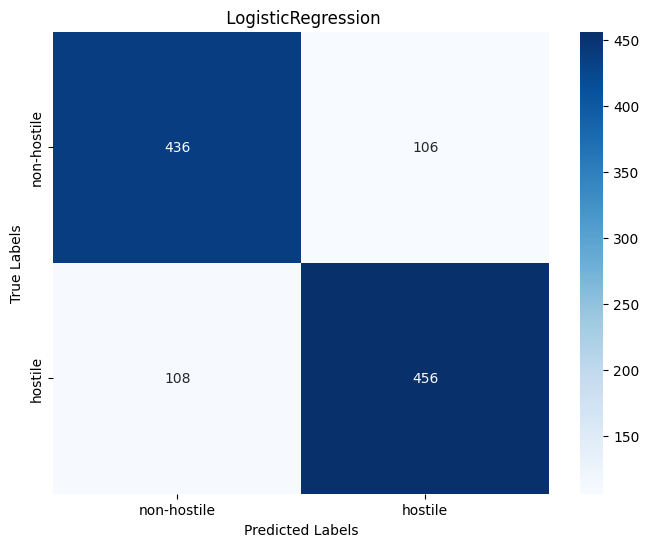

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['non-hostile', 'hostile'], yticklabels=['non-hostile', 'hostile'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(' LogisticRegression')
plt.show()

In [ ]:
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

text_data = X

# Tokenize the English text data
tokenized_data = [nltk.word_tokenize(sentence) for sentence in text_data]

# Train Word2Vec model
vector_size = 1000
window_size = 5
min_count = 1
word2vec_model = Word2Vec(tokenized_data, vector_size=vector_size, window=window_size, min_count=min_count)

# Load the KeyedVectors from the model
word_vectors = word2vec_model.wv

# Define a function to calculate the vector representation of a document
def document_vectorizer(doc, word_vectors):
    doc_vector = np.zeros(vector_size)
    num_words = 0
    for word in doc:
        if word in word_vectors:
            doc_vector += word_vectors.get_vector(word)
            num_words += 1
    if num_words > 0:
        doc_vector /= num_words
    return doc_vector

# Create document vectors for all documents
document_vectors = [document_vectorizer(doc, word_vectors) for doc in tokenized_data]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(document_vectors, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Transform the validation data using the same TF-IDF vectorizer
X_val_tfidf = tfidf_vectorizer.transform(X_val)

# Predict labels on the training set
y_train_pred = rf_classifier.predict(X_train)

# Predict labels on the validation set
y_val_pred = rf_classifier.predict(X_val_tfidf)

# Predict labels on the test set
y_test_pred = rf_classifier.predict(X_test)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
classification_rep_val = classification_report(y_val, y_val_pred)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
classification_rep_test = classification_report(y_test, y_test_pred)

# Print the accuracies
print("Train Set Accuracy:", train_accuracy)
print("Validation Set Accuracy:",val_accuracy)
print("Classification Report (Validation):\n", classification_rep_val)
print("Test Set Accuracy:", test_accuracy)
print("Classification Report (Test):\n", classification_rep_test)st)


Test Set Accuracy: 0.7179023508137432
Classification Report (Test):
               precision    recall  f1-score   support

     hostile       0.74      0.71      0.73       581
 non-hostile       0.70      0.72      0.71       525

    accuracy                           0.72      1106
   macro avg       0.72      0.72      0.72      1106
weighted avg       0.72      0.72      0.72      1106



Confusion Matrix:
[[415 166]
 [146 379]]


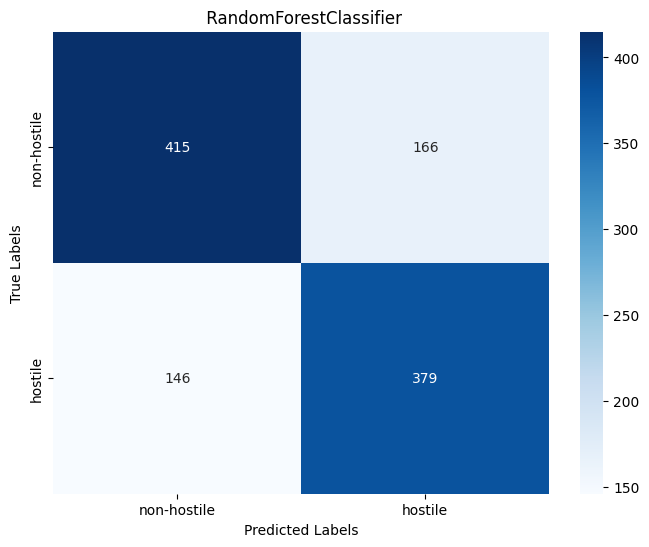

In [ ]:

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['non-hostile', 'hostile'], yticklabels=['non-hostile', 'hostile'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(' RandomForestClassifier')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split the English dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state=42
)

# Define the N-gram range (2-grams)
ngram_range = (1, 2)

# Create a TfidfVectorizer with the specified N-gram range and max features
tfidf_vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=1000)

# Fit and transform the English text data to create a document-term matrix for training
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the English text data for testing
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the Naive Bayes classifier on the training data
nb_classifier.fit(X_train_tfidf, y_train)

# Predict labels on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Test Set Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Test Set Accuracy: 0.7875226039783002
Classification Report:
               precision    recall  f1-score   support

     hostile       0.80      0.79      0.80       581
 non-hostile       0.77      0.78      0.78       525

    accuracy                           0.79      1106
   macro avg       0.79      0.79      0.79      1106
weighted avg       0.79      0.79      0.79      1106



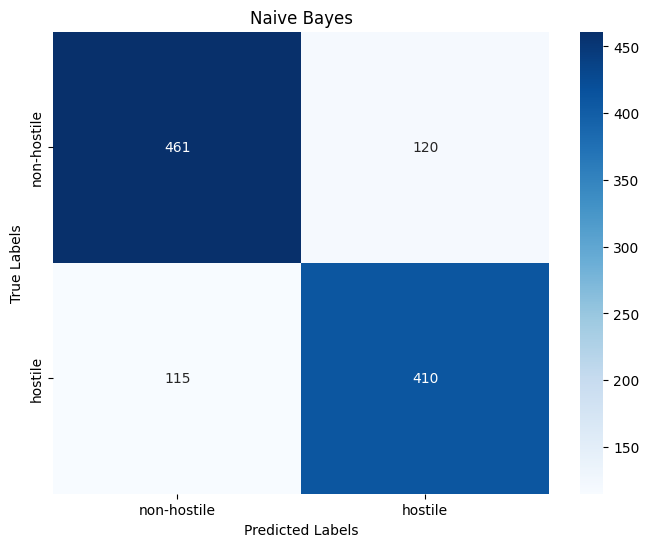

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['non-hostile', 'hostile'], yticklabels=['non-hostile', 'hostile'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Naive Bayes')
plt.show()


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 105.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.3 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=len(y_train.unique()))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tokenize input data
train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
val_encodings = tokenizer(list(X_val), truncation=True, padding=True)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True)


In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset, TensorDataset
# Convert target labels to integers
y_train = y_train.map({'non-hostile': 0, 'hostile': 1})
y_val = y_val.map({'non-hostile': 0, 'hostile': 1})
y_test = y_test.map({'non-hostile': 0, 'hostile': 1})

# Now you can create the TensorDatasets
train_dataset = TensorDataset(torch.tensor(train_encodings.input_ids),
                              torch.tensor(train_encodings.attention_mask),
                              torch.tensor(y_train.values, dtype=torch.long))

val_dataset = TensorDataset(torch.tensor(val_encodings.input_ids),
                            torch.tensor(val_encodings.attention_mask),
                            torch.tensor(y_val.values, dtype=torch.long))

test_dataset = TensorDataset(torch.tensor(test_encodings.input_ids),
                             torch.tensor(test_encodings.attention_mask),
                             torch.tensor(y_test.values, dtype=torch.long))

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score, classification_report

# Define the number of training epochs
num_epochs = 5

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=2)  # Assuming binary classification

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Training loop
for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        # Filter labels that are out of bounds
        labels = labels[labels >= 0]

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    # Validation loop
    model.eval()
    val_predictions = []
    val_true_labels = []
    val_losses = []

    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            # Filter labels that are out of bounds
            labels = labels[labels >= 0]

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss.item()
            val_losses.append(loss)

            logits = outputs.logits
            probabilities = torch.softmax(logits, dim=1)
            predicted_labels = torch.argmax(probabilities, dim=1)

            val_predictions.extend(predicted_labels.cpu().numpy())
            val_true_labels.extend(labels.cpu().numpy())

    # Calculate validation accuracy and other metrics
    val_accuracy = accuracy_score(val_true_labels, val_predictions)
    val_classification_report = classification_report(val_true_labels, val_predictions)

    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Validation Loss: {sum(val_losses) / len(val_losses)}")
    print(f"Validation Accuracy: {val_accuracy}")
    print(f"Validation Classification Report:\n{val_classification_report}")

# Test loop
model.eval()
test_predictions = []
test_true_labels = []
test_losses = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        # Filter labels that are out of bounds
        labels = labels[labels >= 0]

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss.item()
        test_losses.append(loss)

        logits = outputs.logits


        probabilities = torch.softmax(logits, dim=1)
        predicted_labels = torch.argmax(probabilities, dim=1)

        test_predictions.extend(predicted_labels.cpu().numpy())
        test_true_labels.extend(labels.cpu().numpy())

# Calculate test accuracy and other metrics
test_accuracy = accuracy_score(test_true_labels, test_predictions)
test_classification_report = classification_report(test_true_labels, test_predictions)

print("Test Loss:", sum(test_losses) / len(test_losses))
print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", test_classification_report)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/5
Validation Loss: 0.18022965863347054
Validation Accuracy: 0.9349005424954792
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       538
           1       0.91      0.96      0.94       568

    accuracy                           0.93      1106
   macro avg       0.94      0.93      0.93      1106
weighted avg       0.94      0.93      0.93      1106

Epoch 2/5
Validation Loss: 0.14358507969549725
Validation Accuracy: 0.9584086799276673
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       538
           1       0.94      0.98      0.96       568

    accuracy                           0.96      1106
   macro avg       0.96      0.96      0.96      1106
weighted avg       0.96      0.96      0.96      1106

Epoch 3/5
Validation Loss: 0.12101032534348113
Validation Accuracy: 0.9701627486437613
Validation Classi

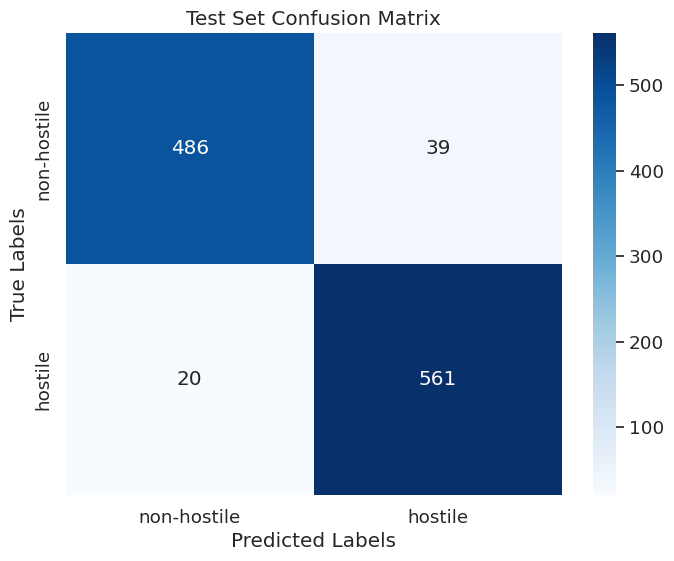

In [ ]:
# Calculate the confusion matrix for the test set
conf_matrix_test = confusion_matrix(test_true_labels, test_predictions)

# Define your class labels (assuming binary classification)
class_labels = ['non-hostile', 'hostile']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size as needed
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Test Set Confusion Matrix')

# Display the heatmap
plt.show()

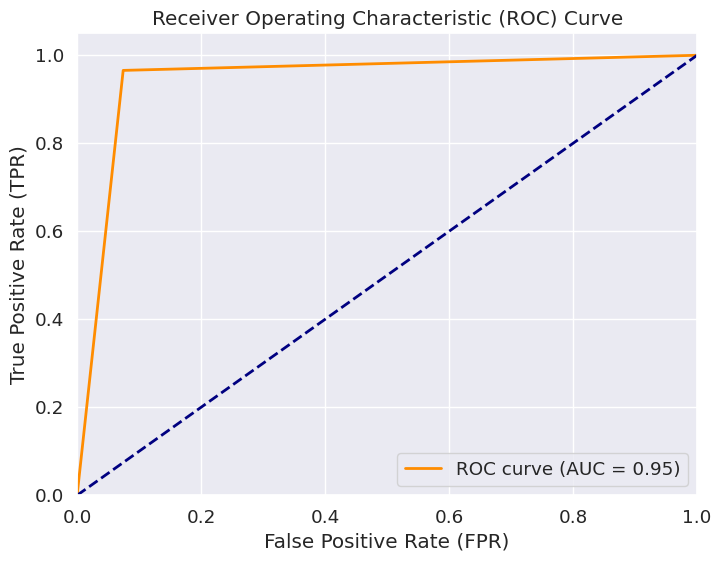

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(test_true_labels, test_predictions)
roc_auc = roc_auc_score(test_true_labels, test_predictions)

plt.figure(figsize=(8, 6))

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

# Add a diagonal line for reference (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()
